# **Temat**: **MCMC - Próbkowanie rozkładu dyskretnego** 
## **Autorzy**: **Jakub Pietrzak** i **Dominik Strzałko**
## **Data**: 17-28.06.2021
##### **Opis zadania**: Próbkowanie metodą MCMC. Zastosowanie do całkowania numerycznego.
Implementacja algorytmu Metropolisa-Hastingsa i zastosowanie go do próbkowania o żądanym rozkładzie. W projekcie proszę wybrać kilka poglądowych przykładów, uwzględniając w tym próbkowanie w wielu wymiarach. W implementacji należy wziąć pod uwagę wariant, w którym rozkład testowy jest dyskretny.

Wykorzystanie rozkładu z bardzo dużą liczbą stanów (np. 100, 1000) do obliczenia całek numerycznych w dwóch, trzech wymiarach (spacery losowe niezbalansowane, pokazanie dokłądnej zależności zbieżności do rozkładu stacjonarnego od rozkładów pomocniczych)

Link do collaba: https://colab.research.google.com/drive/1viHTWZ3s1we04S-AoVGjR05uvUCXGcqp

# 0. Wstęp teoretyczny

Algorytm Metropolisa-Hastingsa – generuje błądzenie losowe w oparciu o gęstość przyjmowania i odrzucania propozycji kolejnych kroków.

![title](https://raw.githubusercontent.com/SnowyCocoon/AI_ML_Math_Projects/main/4.%20MCMC%20Integrals%20with%20Discrete%20Sets/Img1.png)

https://twiecki.io/blog/2015/11/10/mcmc-sampling/

https://machinelearningmastery.com/markov-chain-monte-carlo-for-probability/

https://towardsdatascience.com/bayesian-statistics-metropolis-hastings-from-scratch-in-python-c3b10cc4382d

https://towardsdatascience.com/markov-chain-monte-carlo-in-python-44f7e609be98

https://www.youtube.com/watch?v=KmqTrm-bn8k

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 1. Wersja dla rozkładu stacjonarnego: {0,1,2,3,4} z rozkładem prawdopodobieństwa P(X=i)=1/5. 
Wraz z próbnikiem który generuje wartości {-1,0,1} zgodnie z rozkładem P(X=0) = 1/3, P(X=1)=1/6, P(X=-1) = 1-(1/3+1/6) 

In [2]:
def u():
    return np.random.rand()

In [3]:
def No(): #Rozkład Próbkowania
    x = np.random.randint(0,6)
    if x <= 1:
      return 0
    elif x <= 2:
      return 1
    else:
      return -1

In [4]:
def P(x): #Żądany finalny rozkład
    return 0.2

In [5]:
def g(x0,x1): #Rozkład Pomocniczy
  if(x0 == 0 and x1 == 4):
    return float(1/2)
  if(x0 == 4 and x1 == 0):
    return float(1/6)
  
  if x0 == x1:
    return float(1/3)
  elif x0 > x1:
    return float(1/2)
  elif x1 > x0:
    return float(1/6)

In [6]:
def MetropolisAlg(x0,N,No,P,g):
    states = []
    while N>0:
        states.append(x0)
        x1=(x0+No())%5
        A=min(1,(P(x1)/P(x0))*(g(x0,x1)/g(x1,x0)))
        if u()<=A:
            x0=x1
        N=N-1
    return states

### 1.1. Przykład dla 1k próbek

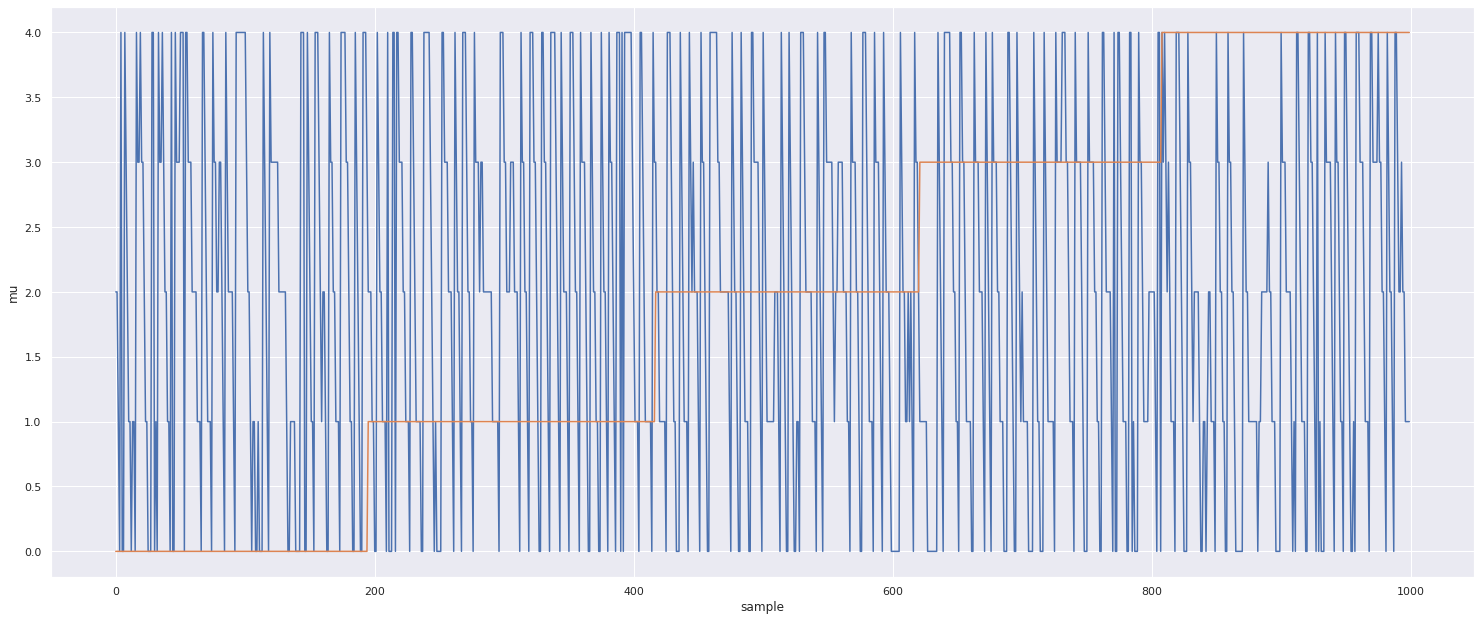

In [7]:
example=MetropolisAlg(2,1000,No,P,g)

fig, ax = plt.subplots()
fig.set_size_inches(25.5, 10.5)
ax.plot(example)
_ = ax.set(xlabel='sample', ylabel='mu');

plt.plot(sorted(example))

In [8]:
x = np.array(example)

occurrences = np.count_nonzero(x == 0)
print(occurrences)
occurrences = np.count_nonzero(x == 1)
print(occurrences)
occurrences = np.count_nonzero(x == 2)
print(occurrences)
occurrences = np.count_nonzero(x == 3)
print(occurrences)
occurrences = np.count_nonzero(x == 4)
print(occurrences)


195
222
204
187
192


In [50]:
Mark1=MetropolisAlg(2,10000,No,P,g)
Mark2=MetropolisAlg(2,10000,No,P,g)
Mark3=MetropolisAlg(2,10000,No,P,g)

#### a^2 * b^2

![title](https://raw.githubusercontent.com/SnowyCocoon/AI_ML_Math_Projects/main/4.%20MCMC%20Integrals%20with%20Discrete%20Sets/Img5.png)

Wartosc numeryczna całki = 570.995200
Wartosc teoretyczna całki = 455.111000


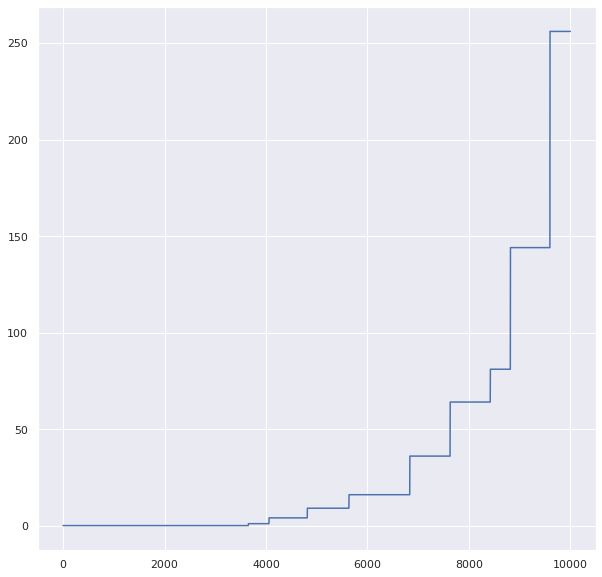

In [10]:
ff=lambda a,b: a**2*b**2
li=[ff(Mark1[i],Mark2[i]) for i in range(0,10000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
print("Wartosc teoretyczna całki = %f"%(455.111))


#### a^2
![title](https://raw.githubusercontent.com/SnowyCocoon/AI_ML_Math_Projects/main/4.%20MCMC%20Integrals%20with%20Discrete%20Sets/Img3.png)

Wartosc numeryczna całki = 23.284000
Wartosc teoretyczna całki = 21.333000


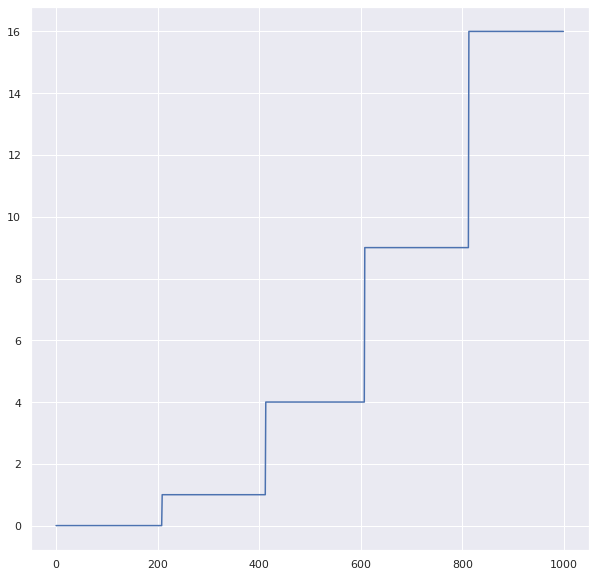

In [11]:
ff=lambda a: a**2
li=[ff(Mark1[i]) for i in range(0,1000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*4))
print("Wartosc teoretyczna całki = %f"%(21.333))

#### a
![title](https://raw.githubusercontent.com/SnowyCocoon/AI_ML_Math_Projects/main/4.%20MCMC%20Integrals%20with%20Discrete%20Sets/Img2.png)

Wartosc numeryczna całki = 7.828000
Wartosc teoretyczna całki = 8.000000


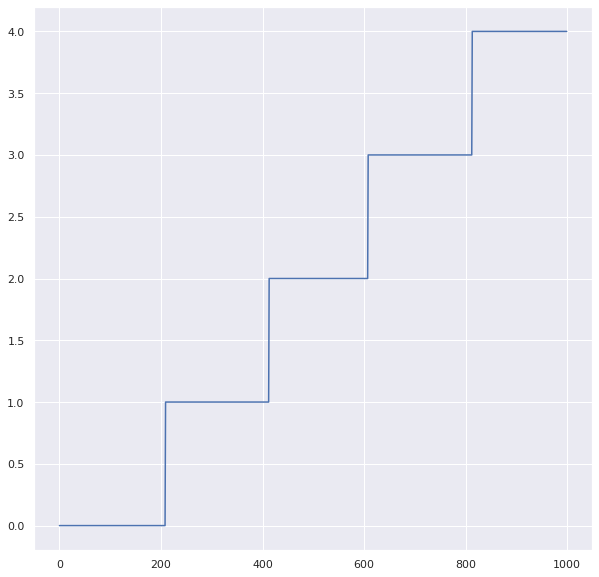

In [12]:
ff=lambda a: a
li=[ff(Mark1[i]) for i in range(0,1000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*4))
print("Wartosc teoretyczna całki = %f"%(8))

#### a*b*c


Wartosc numeryczna całki = 485.056000
Wartosc teoretyczna całki = 512.000000


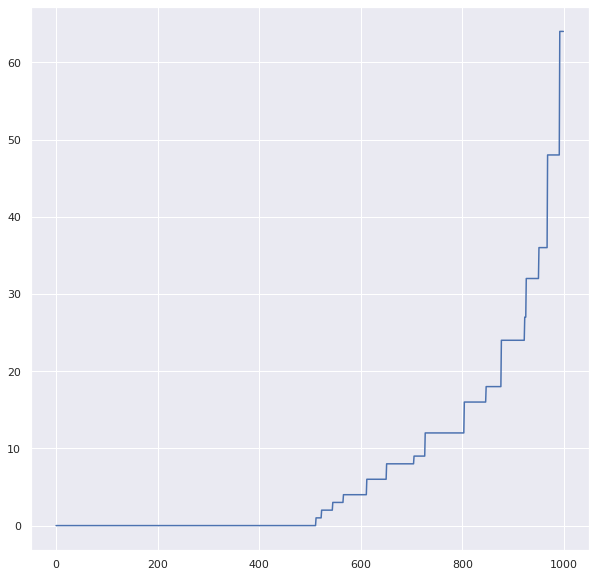

In [13]:
ff=lambda x,y,z: x*y*z
li=[ff(Mark1[i],Mark2[i],Mark3[i]) for i in range(0,1000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*64))
print("Wartosc teoretyczna całki = %f"%(512))

#### sin(a) + 2*cos(b)
![title](https://raw.githubusercontent.com/SnowyCocoon/AI_ML_Math_Projects/main/4.%20MCMC%20Integrals%20with%20Discrete%20Sets/Img4.png)
![title](https://raw.githubusercontent.com/SnowyCocoon/AI_ML_Math_Projects/main/4.%20MCMC%20Integrals%20with%20Discrete%20Sets/Img6.png)

Wartosc numeryczna całki = 0.169562
Wartosc teoretyczna całki = 0.560000


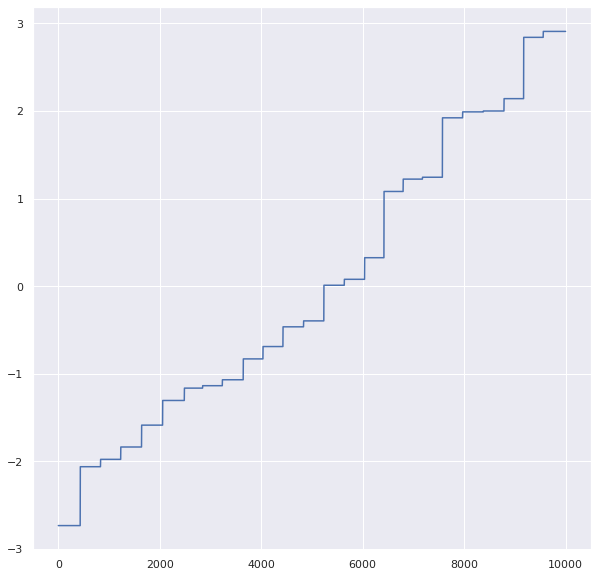

In [52]:
ff=lambda a,b: np.sin(a) + 2 * np.cos(b)
li=[ff(Mark1[i],Mark2[i]) for i in range(0,10000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
print("Wartosc teoretyczna całki = %f"%(0.560))

### 1.2. Wersja interaktywna

In [15]:
from google.colab import widgets

ff=lambda a,b: a**2*b**2

Mark1=MetropolisAlg(2,10000000,No,P,g)
Mark2=MetropolisAlg(2,10000000,No,P,g)

def Interactive_plot_independent():
  tb = widgets.TabBar([str(i) for i in range(1,9)])
  for i in range(0,8):
      with tb.output_to(i):
        samples = 10**i

        li=[ff(Mark1[i],Mark2[i]) for i in range(0,samples)]
        plt.rcParams["figure.figsize"] = (10,10)
        plt.plot(sorted(li))
        print(f'Liczba próbek {samples}')
        print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
        print("Wartosc teoretyczna całki = %f"%(455.111000))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1
Wartosc numeryczna całki = 256.000000
Wartosc teoretyczna całki = 455.111000


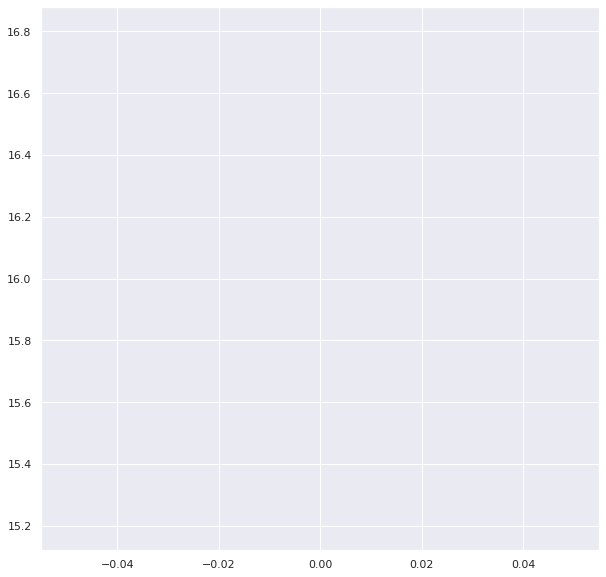

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10
Wartosc numeryczna całki = 430.400000
Wartosc teoretyczna całki = 455.111000


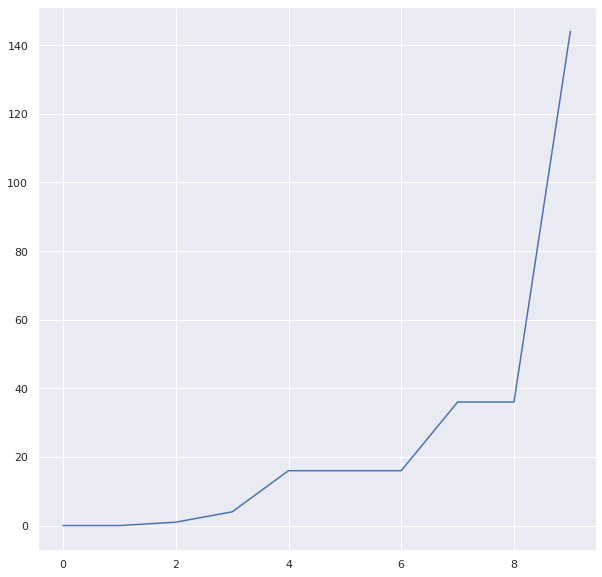

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 100
Wartosc numeryczna całki = 472.320000
Wartosc teoretyczna całki = 455.111000


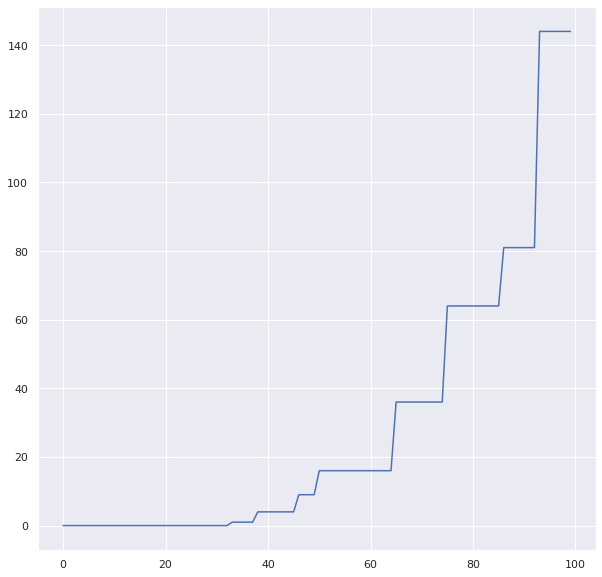

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1000
Wartosc numeryczna całki = 540.752000
Wartosc teoretyczna całki = 455.111000


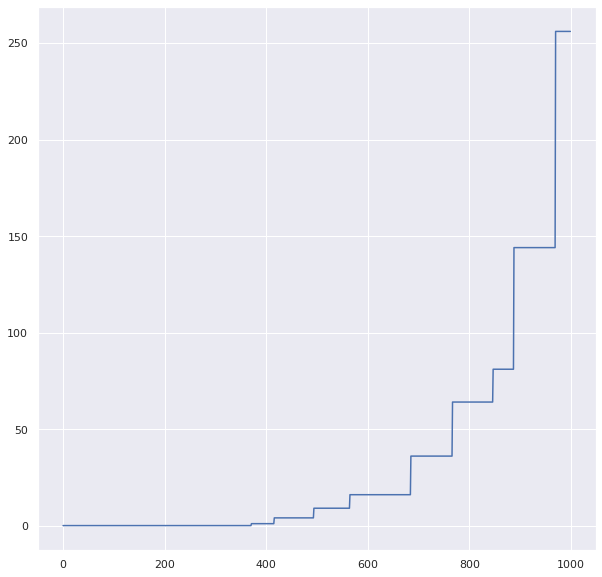

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10000
Wartosc numeryczna całki = 590.668800
Wartosc teoretyczna całki = 455.111000


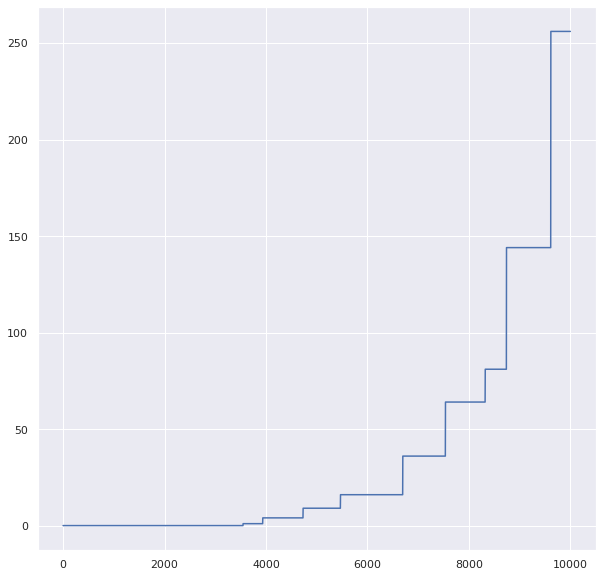

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 100000
Wartosc numeryczna całki = 572.888640
Wartosc teoretyczna całki = 455.111000


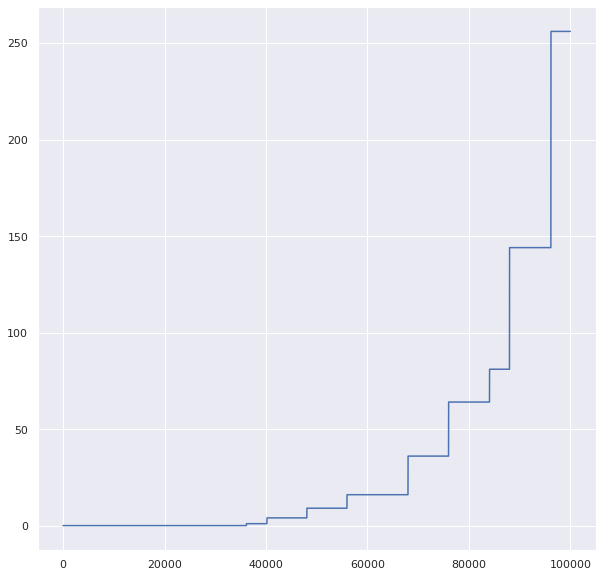

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1000000
Wartosc numeryczna całki = 576.188944
Wartosc teoretyczna całki = 455.111000


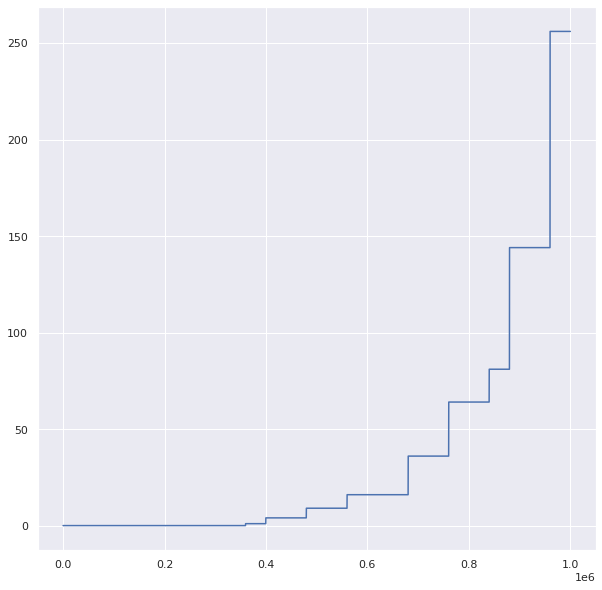

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10000000
Wartosc numeryczna całki = 575.702325
Wartosc teoretyczna całki = 455.111000


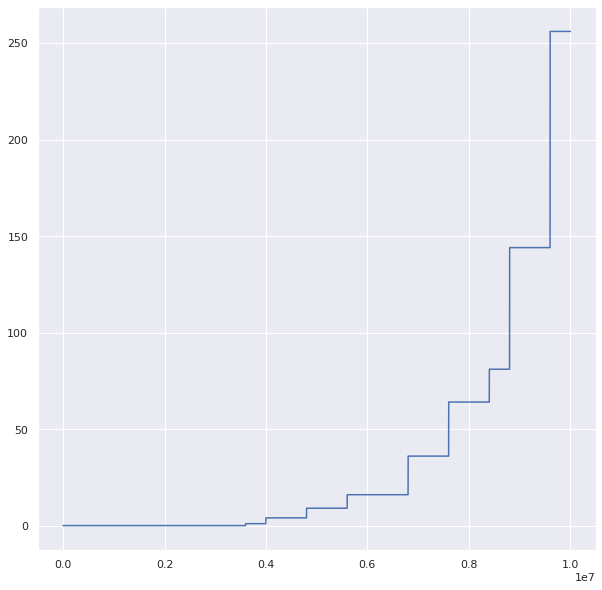

<IPython.core.display.Javascript object>

In [16]:
Interactive_plot_independent()

# 2. Wersja dla 40 stanów ze stanami {0,0.1,0.2,...,3.8,3.9} z rozkładem prawdopodobieństwa P(X=i)=1/40. 

Wraz z próbnikiem który generuje wartości {-0.1,0,0.1} zgodnie z rozkładem P(X=0) = 1/2, P(X=0.1)=1/4, P(X=-0.1) = 1-(1/2+1/4) 

In [17]:
def No_40(): #Rozkład Próbkowania
    x = np.random.randint(0,8)
    if x <= 3:
      return 0
    elif x <= 5:
      return 0.1
    else:
      return -0.1

In [18]:
def P_40(x): #Żądany finalny rozkład
    return 0.025

In [19]:
def MetropolisAlg_40(x0,N,No,P,g):
    states = []
    while N>0:
        states.append(x0)
        temp = x0+No()
        x1=round(temp,1) % round(4,1)
        x1 = round(x1,1)
        A=min(1,(P(x1)/P(x0))*(g(x0,x1)/g(x1,x0)))
        if u()<=A:
            x0=x1
        N=N-1
    return states

In [20]:
def g_40(x0,x1): #Rozkład Pomocniczy
  if(x0 == 0.0 and x1 == 3.9):
    return float(1/4)
  if(x0 == 3.9 and x1 == 0.0):
    return float(1/4)
  
  if x0 == x1:
    return float(1/2)
  elif x0 > x1:
    return float(1/4)
  elif x1 > x0:
    return float(1/4)

### 2.1. Przykład dla 100000 Próbek (100 tyś)

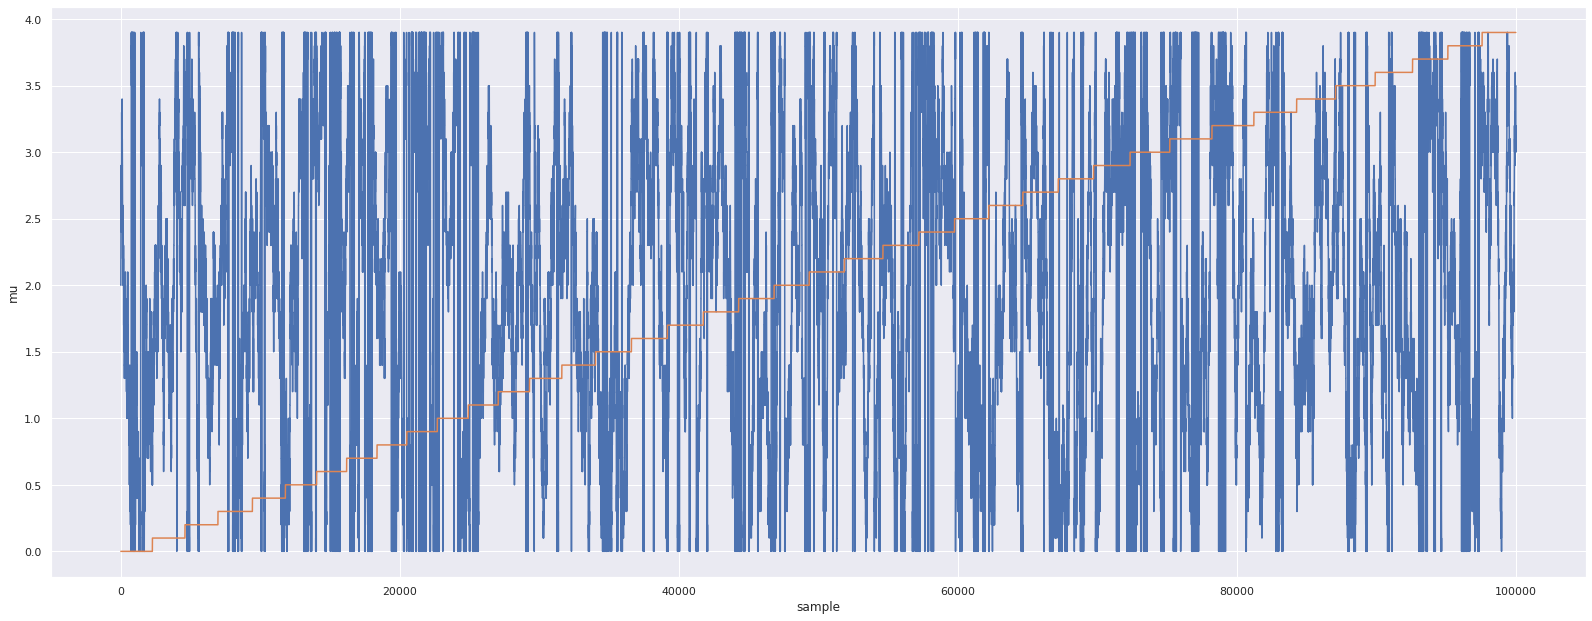

In [22]:
example_40=MetropolisAlg_40(2.0,100000,No_40,P_40,g_40)

fig, ax = plt.subplots()
fig.set_size_inches(27.5, 10.5)
ax.plot(example_40)
_ = ax.set(xlabel='sample', ylabel='mu');

plt.plot(sorted(example_40))

Wartosc numeryczna całki = 458.323098
Wartosc teoretyczna całki = 455.111000


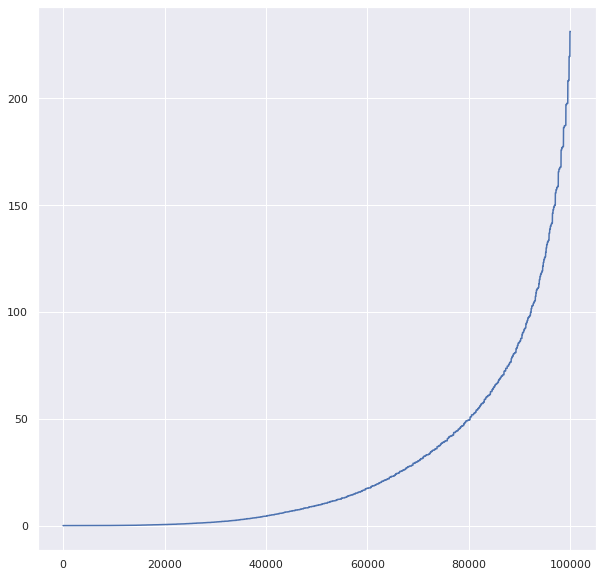

In [23]:
Mark1_40=MetropolisAlg_40(2,100000,No_40,P_40,g_40)
Mark2_40=MetropolisAlg_40(2,100000,No_40,P_40,g_40)
Mark3_40=MetropolisAlg_40(2,100000,No_40,P_40,g_40)

ff=lambda a,b: a**2*b**2
li=[ff(Mark1_40[i],Mark2_40[i]) for i in range(0,100000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
print("Wartosc teoretyczna całki = %f"%(455.111))

Wartosc numeryczna całki = 21.273445
Wartosc teoretyczna całki = 21.333000


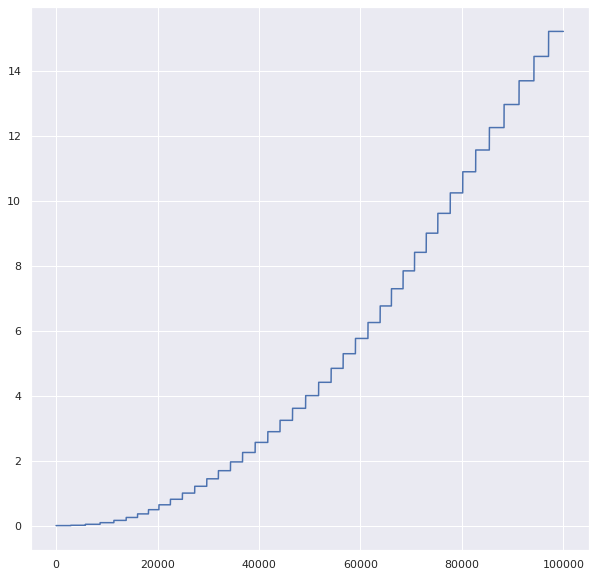

In [24]:
ff=lambda a: a**2
li=[ff(Mark1_40[i]) for i in range(0,100000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*4))
print("Wartosc teoretyczna całki = %f"%(21.333))

Wartosc numeryczna całki = 7.909180
Wartosc teoretyczna całki = 8.000000


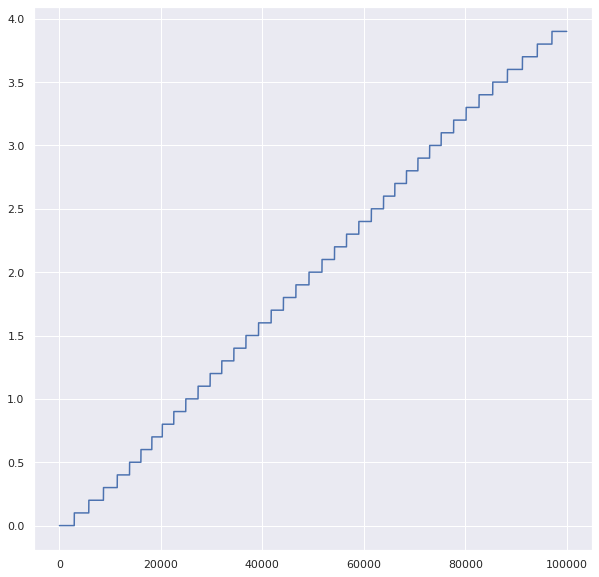

In [25]:
ff=lambda a: a
li=[ff(Mark1_40[i]) for i in range(0,100000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*4))
print("Wartosc teoretyczna całki = %f"%(8))

Wartosc numeryczna całki = 513.110251
Wartosc teoretyczna całki = 512.000000


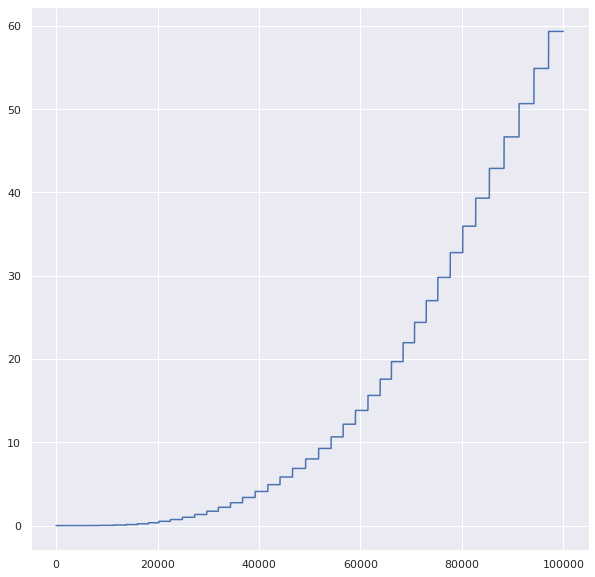

In [26]:
ff=lambda x,y,z: x*y*z
li=[ff(Mark1_40[i],Mark1_40[i],Mark1_40[i]) for i in range(0,100000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*32))
print("Wartosc teoretyczna całki = %f"%(512))

Wartosc numeryczna całki = -0.658308
Wartosc teoretyczna całki = 0.560000


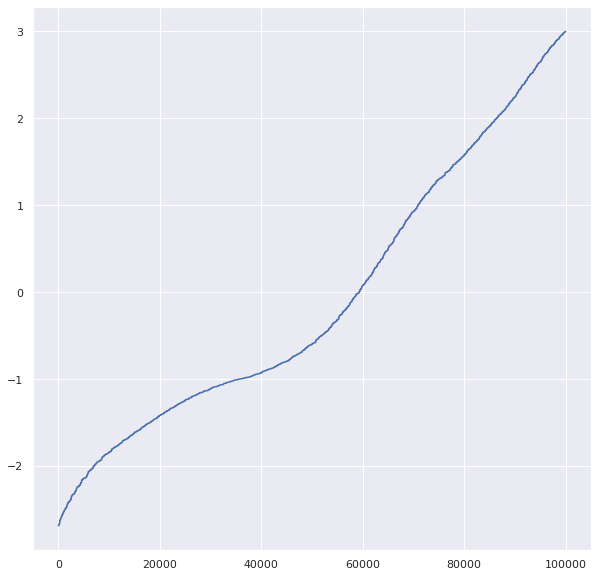

In [27]:
ff=lambda a,b: np.sin(a) + 2 * np.cos(b)
li=[ff(Mark1_40[i],Mark2_40[i]) for i in range(0,100000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
print("Wartosc teoretyczna całki = %f"%(0.560))

### 2.2. Wersja Interaktywna

In [28]:
from google.colab import widgets

ff=lambda a,b: a**2*b**2

Mark1_40=MetropolisAlg_40(2,10000000,No_40,P_40,g_40)
Mark2_40=MetropolisAlg_40(2,10000000,No_40,P_40,g_40)

def Interactive_plot_independent():
  tb = widgets.TabBar([str(i) for i in range(1,9)])
  for i in range(0,8):
      with tb.output_to(i):
        samples = 10**i

        li=[ff(Mark1_40[i],Mark2_40[i]) for i in range(0,samples)]
        plt.rcParams["figure.figsize"] = (10,10)
        plt.plot(sorted(li))
        print(f'Liczba próbek {samples}')
        print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
        print("Wartosc teoretyczna całki = %f"%(455.111000))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1
Wartosc numeryczna całki = 256.000000
Wartosc teoretyczna całki = 455.111000


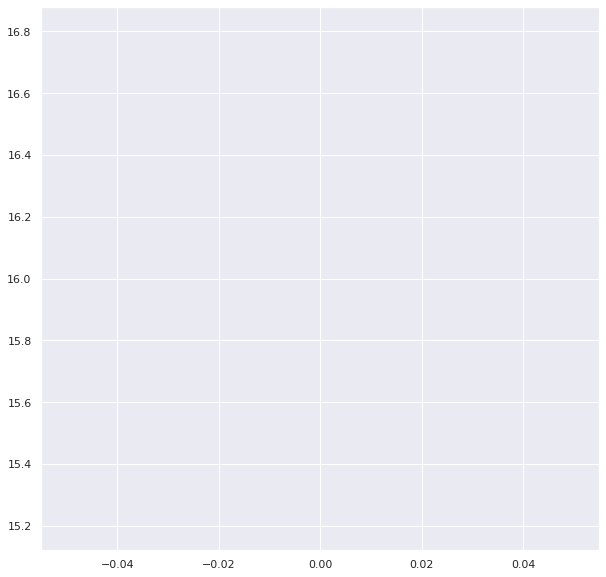

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10
Wartosc numeryczna całki = 290.764960
Wartosc teoretyczna całki = 455.111000


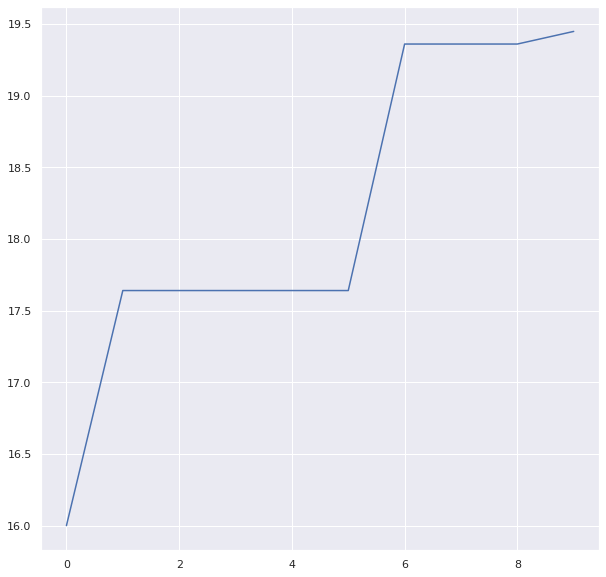

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 100
Wartosc numeryczna całki = 167.022896
Wartosc teoretyczna całki = 455.111000


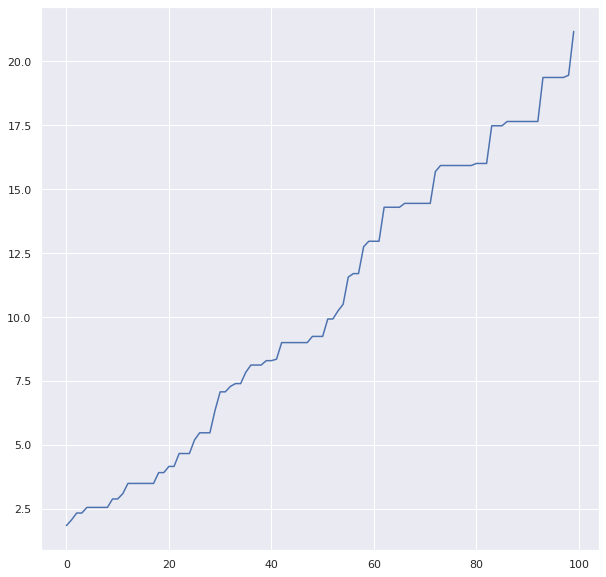

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1000
Wartosc numeryczna całki = 234.908400
Wartosc teoretyczna całki = 455.111000


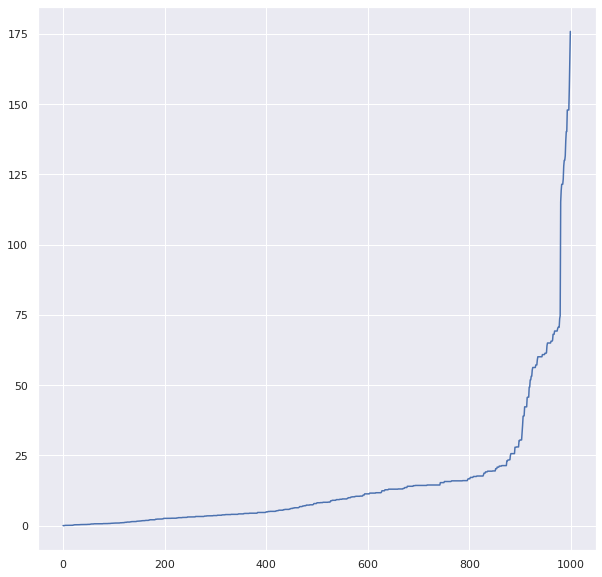

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10000
Wartosc numeryczna całki = 490.138556
Wartosc teoretyczna całki = 455.111000


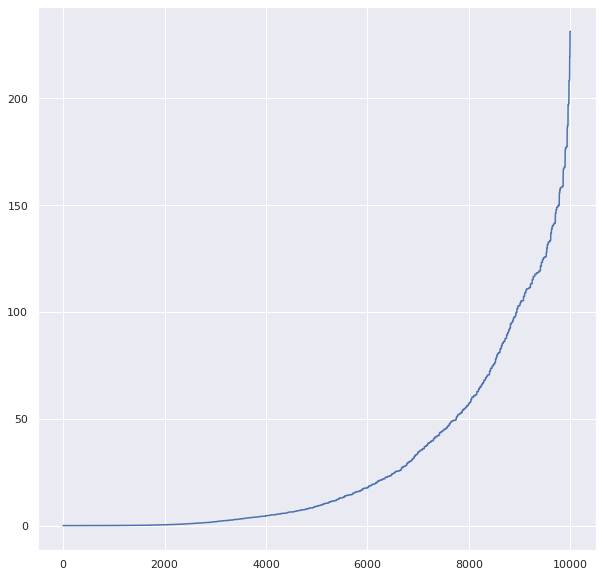

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 100000
Wartosc numeryczna całki = 412.900484
Wartosc teoretyczna całki = 455.111000


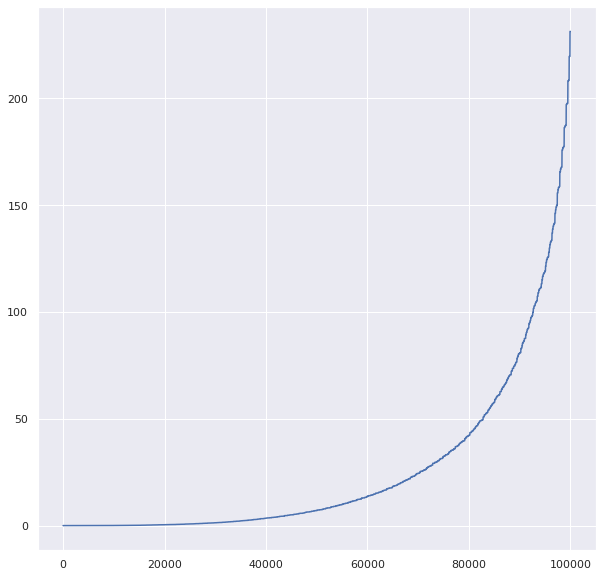

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1000000
Wartosc numeryczna całki = 420.333928
Wartosc teoretyczna całki = 455.111000


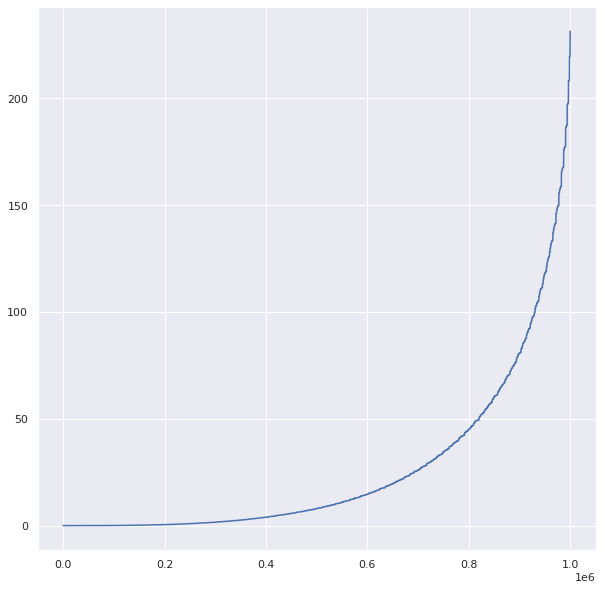

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10000000
Wartosc numeryczna całki = 424.413187
Wartosc teoretyczna całki = 455.111000


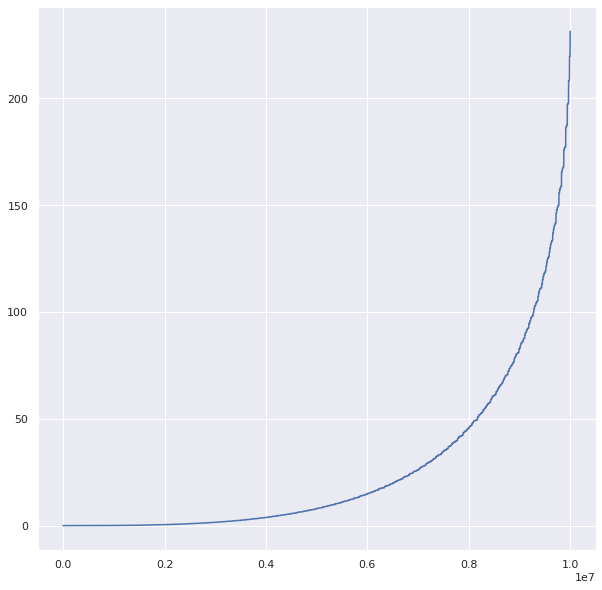

<IPython.core.display.Javascript object>

In [29]:
Interactive_plot_independent()

# 3. Wersja dla 400 stanów ze stanami {0,0.01,0.02,...,3.98,3.99,4.0} z rozkładem prawdopodobieństwa P(X=i)=1/400. 

Wraz z próbnikiem który generuje wartości {-0.01,0,0.01} zgodnie z rozkładem P(X=0) = 1/2, P(X=0.01)=1/4, P(X=-0.01) = 1-(1/2+1/4) 

In [30]:
def No_400(): #Rozkład Próbkowania
    x = np.random.randint(0,8)
    if x <= 3:
      return 0
    elif x <= 5:
      return 0.01
    else:
      return -0.01

In [31]:
def P_400(x): #Żądany finalny rozkład
    return 0.0025

In [32]:
def g_400(x0,x1): #Rozkład Pomocniczy
  if(x0 == 0.0 and x1 == 3.99):
    return float(1/4)
  if(x0 == 3.99 and x1 == 0.0):
    return float(1/4)
  
  if x0 == x1:
    return float(1/2)
  elif x0 > x1:
    return float(1/4)
  elif x1 > x0:
    return float(1/4)

In [33]:
def MetropolisAlg_400(x0,N,No,P,g):
    states = []
    while N>0:
        states.append(x0)
        temp = x0+No()
        x1=round(temp,2) % round(4.00,2)
        x1 = round(x1,2)
        A=min(1,(P(x1)/P(x0))*(g(x0,x1)/g(x1,x0)))
        if u()<=A:
            x0=x1
        N=N-1
    return states

### 3.0. Przykad dla 100000 Próbek (100 Tyś)

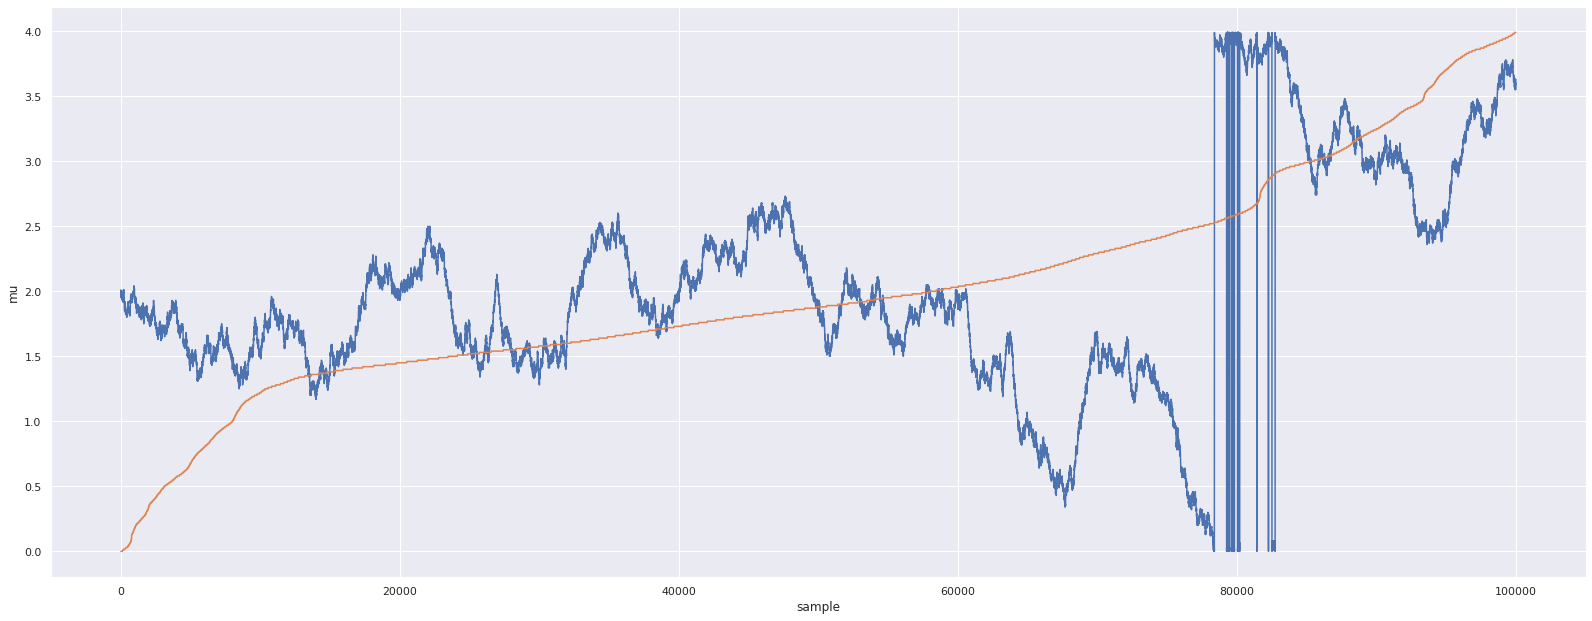

In [34]:
example_400=MetropolisAlg_400(2.0,100000,No_400,P_400,g_400)

fig, ax = plt.subplots()
fig.set_size_inches(27.5, 10.5)
ax.plot(example_400)
_ = ax.set(xlabel='sample', ylabel='mu');

plt.plot(sorted(example_400))

### 3.1. Przykad dla 10000000  Próbek (10 Milionów)


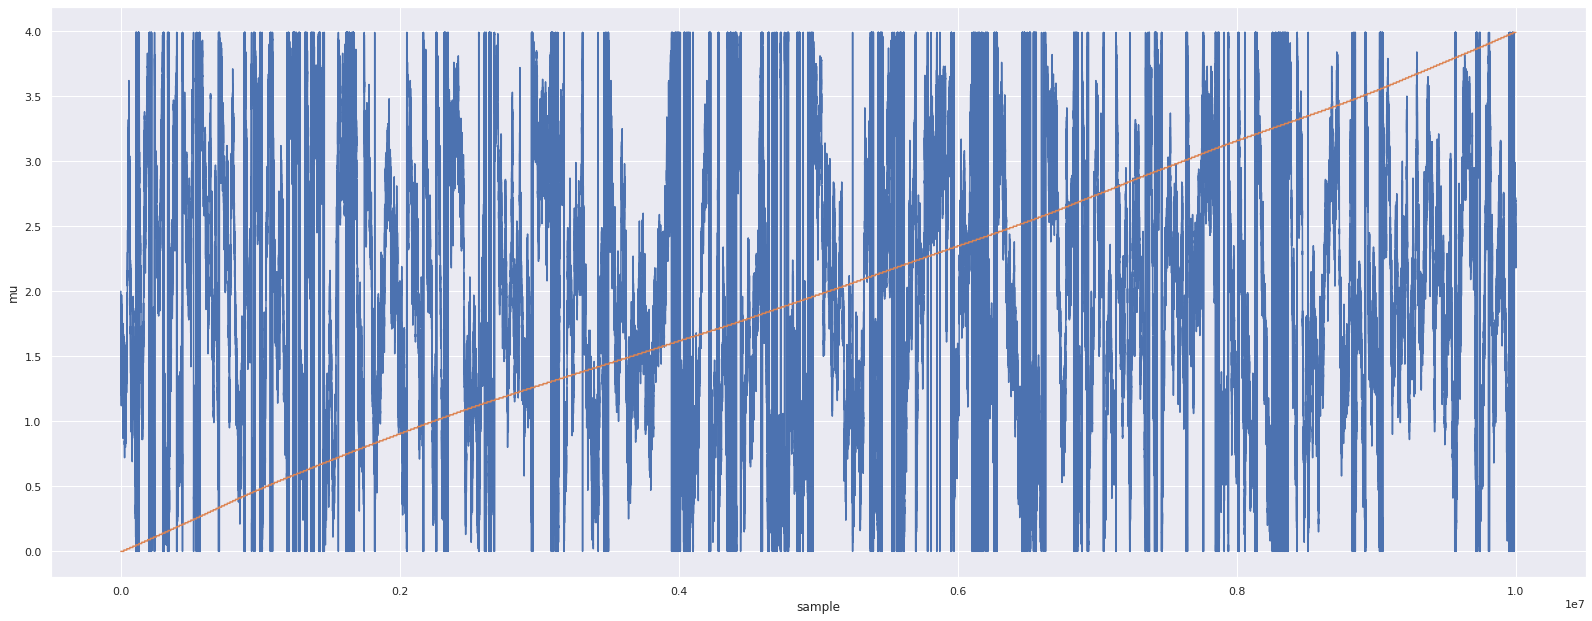

In [35]:
example_400=MetropolisAlg_400(2.0,10000000,No_400,P_400,g_400)

fig, ax = plt.subplots()
fig.set_size_inches(27.5, 10.5)
ax.plot(example_400)
_ = ax.set(xlabel='sample', ylabel='mu');

plt.plot(sorted(example_400))

Wartosc numeryczna całki = 450.092836
Wartosc teoretyczna całki = 455.111000


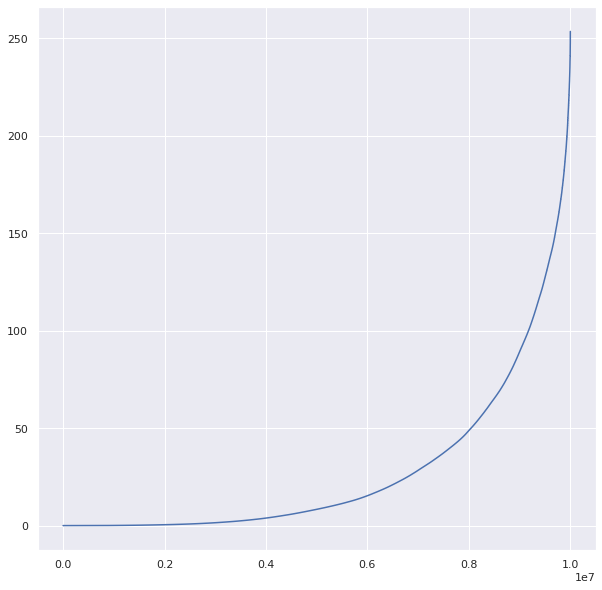

In [36]:
Mark1_400=MetropolisAlg_400(2,10000000,No_400,P_400,g_400)
Mark2_400=MetropolisAlg_400(2,10000000,No_400,P_400,g_400)
Mark3_400=MetropolisAlg_400(2,10000000,No_400,P_400,g_400)

ff=lambda a,b: a**2*b**2
li=[ff(Mark1_400[i],Mark2_400[i]) for i in range(0,10000000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
print("Wartosc teoretyczna całki = %f"%(455.111))

Wartosc numeryczna całki = 21.175664
Wartosc teoretyczna całki = 21.333000


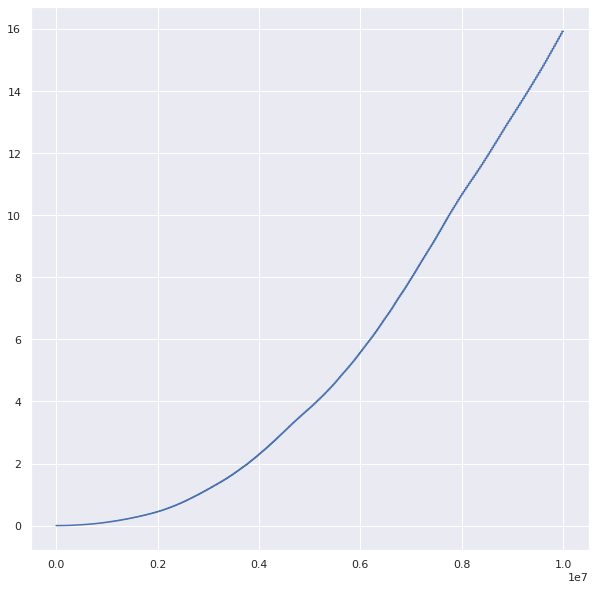

In [37]:
ff=lambda a: a**2
li=[ff(Mark1_400[i]) for i in range(0,10000000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*4))
print("Wartosc teoretyczna całki = %f"%(21.333))

Wartosc numeryczna całki = 7.847844
Wartosc teoretyczna całki = 8.000000


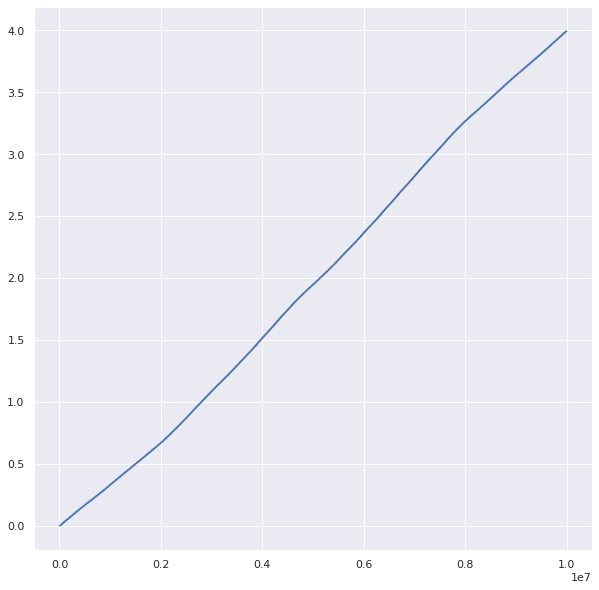

In [38]:
ff=lambda a: a
li=[ff(Mark1_400[i]) for i in range(0,10000000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*4))
print("Wartosc teoretyczna całki = %f"%(8))

Wartosc numeryczna całki = 473.589892
Wartosc teoretyczna całki = 512.000000


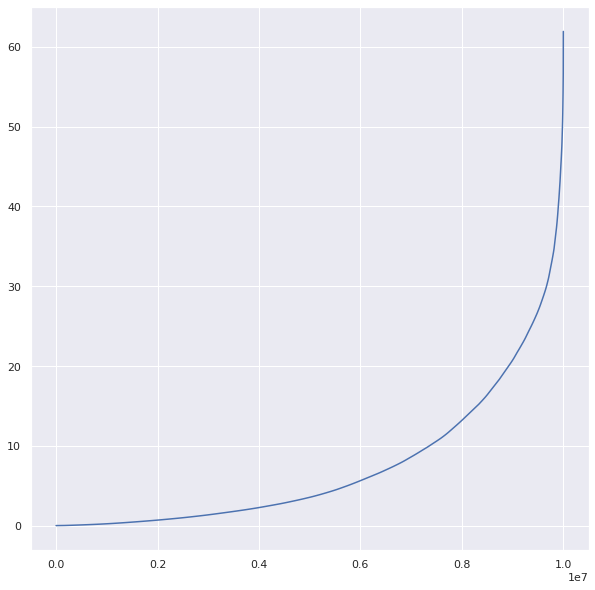

In [39]:
ff=lambda x,y,z: x*y*z
li=[ff(Mark1_400[i],Mark2_400[i],Mark3_400[i]) for i in range(0,10000000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*64))
print("Wartosc teoretyczna całki = %f"%(512))

Wartosc numeryczna całki = 0.493683
Wartosc teoretyczna całki = 0.560000


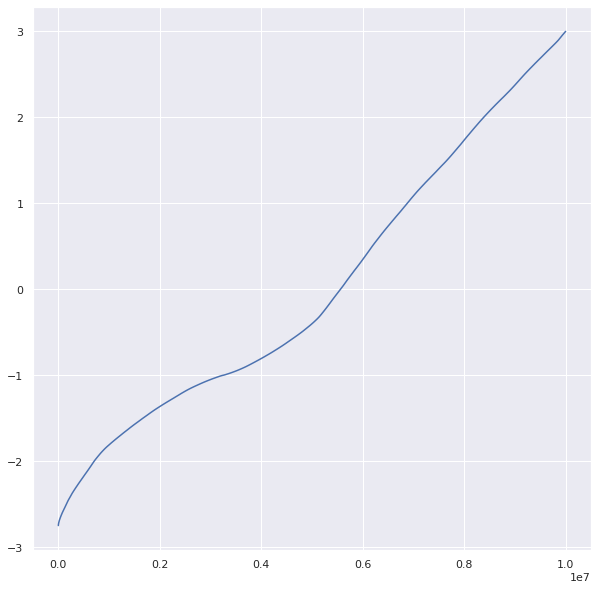

In [49]:
ff=lambda a,b: np.sin(a) + 2 * np.cos(b)
li=[ff(Mark1_400[i],Mark2_400[i]) for i in range(0,10000000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
print("Wartosc teoretyczna całki = %f"%(0.560))

### 3.2. Wersja Interaktywna

In [41]:
from google.colab import widgets

ff=lambda a,b: a**2*b**2

def Interactive_plot_independent():
  tb = widgets.TabBar([str(i) for i in range(1,9)])
  for i in range(0,8):
      with tb.output_to(i):
        samples = 10**i

        li=[ff(Mark1_400[i],Mark2_400[i]) for i in range(0,samples)]
        plt.rcParams["figure.figsize"] = (10,10)
        plt.plot(sorted(li))
        print(f'Liczba próbek {samples}')
        print("Wartosc numeryczna całki = %f"%((sum(li)/len(li))*16))
        print("Wartosc teoretyczna całki = %f"%(455.111000))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1
Wartosc numeryczna całki = 256.000000
Wartosc teoretyczna całki = 455.111000


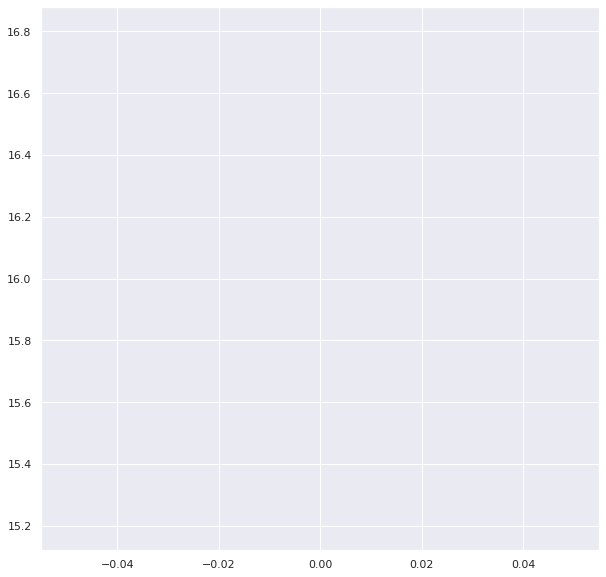

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10
Wartosc numeryczna całki = 254.190849
Wartosc teoretyczna całki = 455.111000


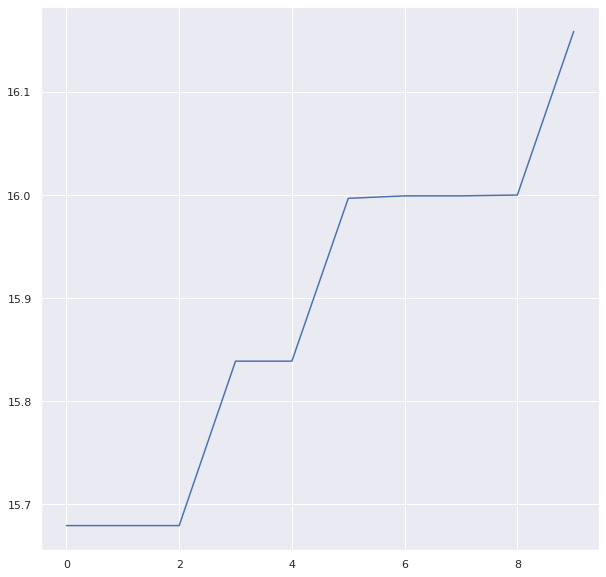

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 100
Wartosc numeryczna całki = 268.572349
Wartosc teoretyczna całki = 455.111000


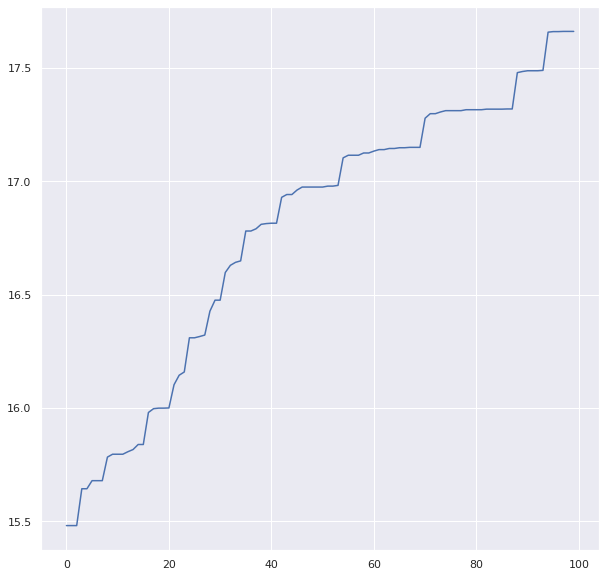

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1000
Wartosc numeryczna całki = 297.998358
Wartosc teoretyczna całki = 455.111000


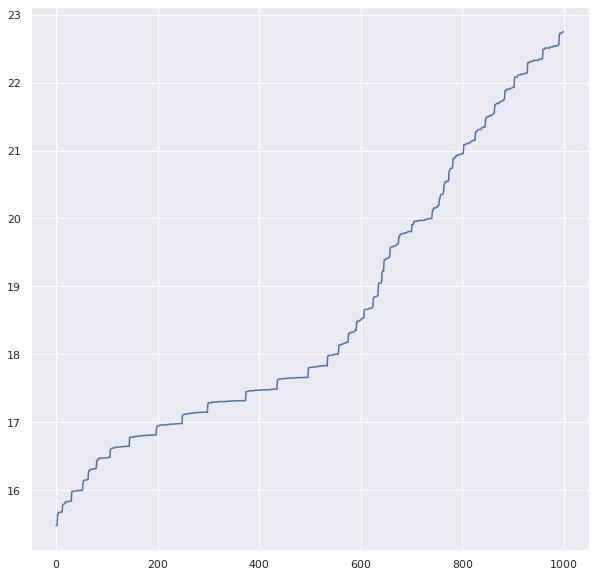

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10000
Wartosc numeryczna całki = 225.048079
Wartosc teoretyczna całki = 455.111000


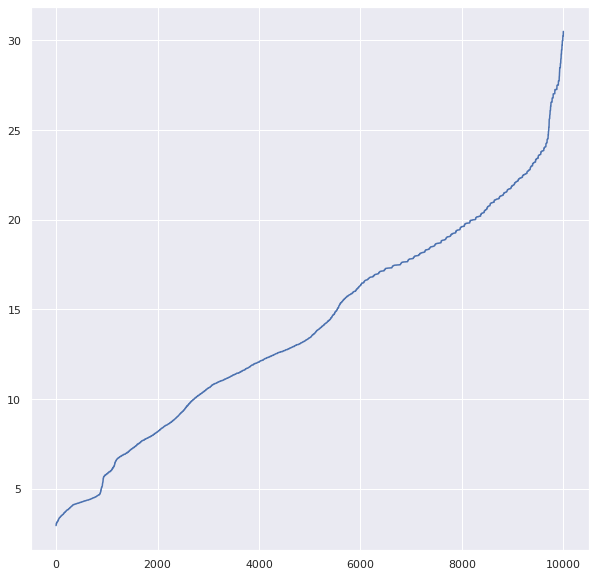

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 100000
Wartosc numeryczna całki = 444.276197
Wartosc teoretyczna całki = 455.111000


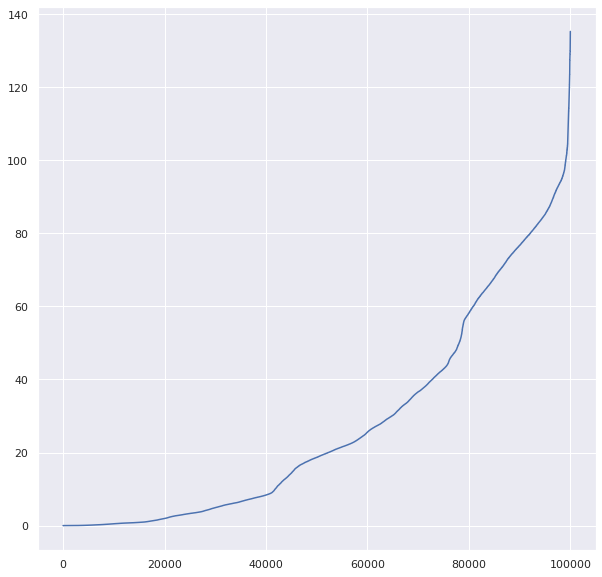

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 1000000
Wartosc numeryczna całki = 522.107408
Wartosc teoretyczna całki = 455.111000


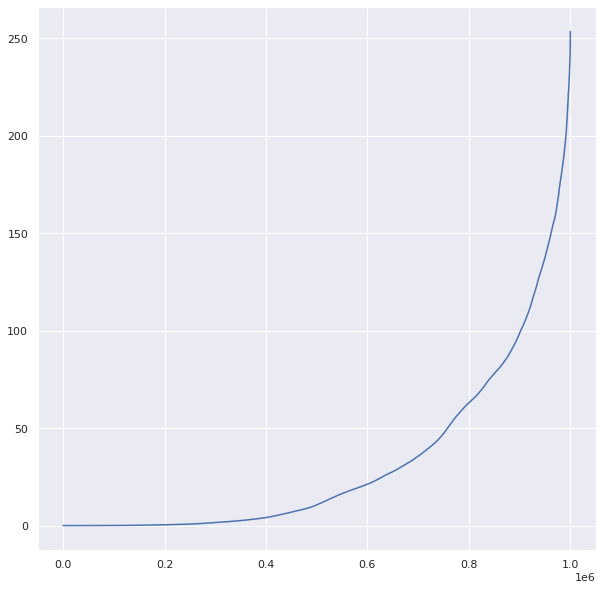

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Liczba próbek 10000000
Wartosc numeryczna całki = 450.092836
Wartosc teoretyczna całki = 455.111000


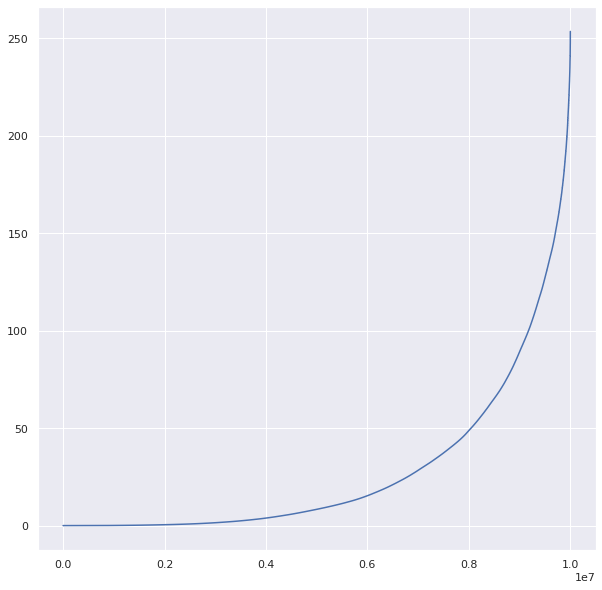

<IPython.core.display.Javascript object>

In [42]:
Interactive_plot_independent()

# 4. Wersja dla 40 stanów ze stanami {0,0.2,0.4,...,7.8} z rozkładem prawdopodobieństwa P(X=i)=1/40. 

Wraz z próbnikiem który generuje wartości {-0.4,-0.2,0,-.2,0.4} zgodnie z rozkładem P(X=-0.4) = 1/5, P(X=-0.2)=1/10, P(X=0) = 2/5, P(X=0.2) = 1/5, P(X=0.4) = 1/10

In [43]:
def No_40_v2(): #Rozkład Próbkowania
    x = np.random.randint(0,10)
    if x <= 3:
      return 0
    elif x <= 5:
      return 0.2
    elif x <= 6:
      return 0.4
    elif x <= 7:
      return -0.2
    else:
      return -0.4

In [44]:
def P_40_v2(x): #Żądany finalny rozkład
    return 0.025

In [45]:
def MetropolisAlg_40_v2(x0,N,No,P,g):
    states = []
    while N>0:
        states.append(x0)
        temp = x0+No()
        x1=round(temp,1) % round(8,1)
        x1 = round(x1,1)
        A=min(1,(P(x1)/P(x0))*(g(x0,x1)/g(x1,x0)))
        if u()<=A:
            x0=x1
        N=N-1
    return states

In [46]:
def g_40_v2(x0,x1): #Rozkład Pomocniczy
  if(x0 == 0.0 and x1 == 7.8):
    return float(1/10)
  if(x0 == 7.8 and x1 == 0.0):
    return float(1/5)
  if(x0 == 0.0 and x1 == 7.6):
    return float(1/5)
  if(x0 == 7.6 and x1 == 0.0):
    return float(1/10)
  if(x0 == 0.2 and x1 == 7.8):
    return float(1/5)
  if(x0 == 7.8 and x1 == 0.2):
    return float(1/10)
  
  if x0 == x1:
    return float(4/10)
  elif x0 > x1:
    if(x1-x0 == -0.2):
      return float(1/10)
    else:
      return float(1/5)
    return float(1/4)
  elif x1 > x0:
    if(x1-x0 == 0.2):
      return float(1/5)
    else:
      return float(1/10)

### 4.1. Przykład dla 100000 próbek (100 tyś)

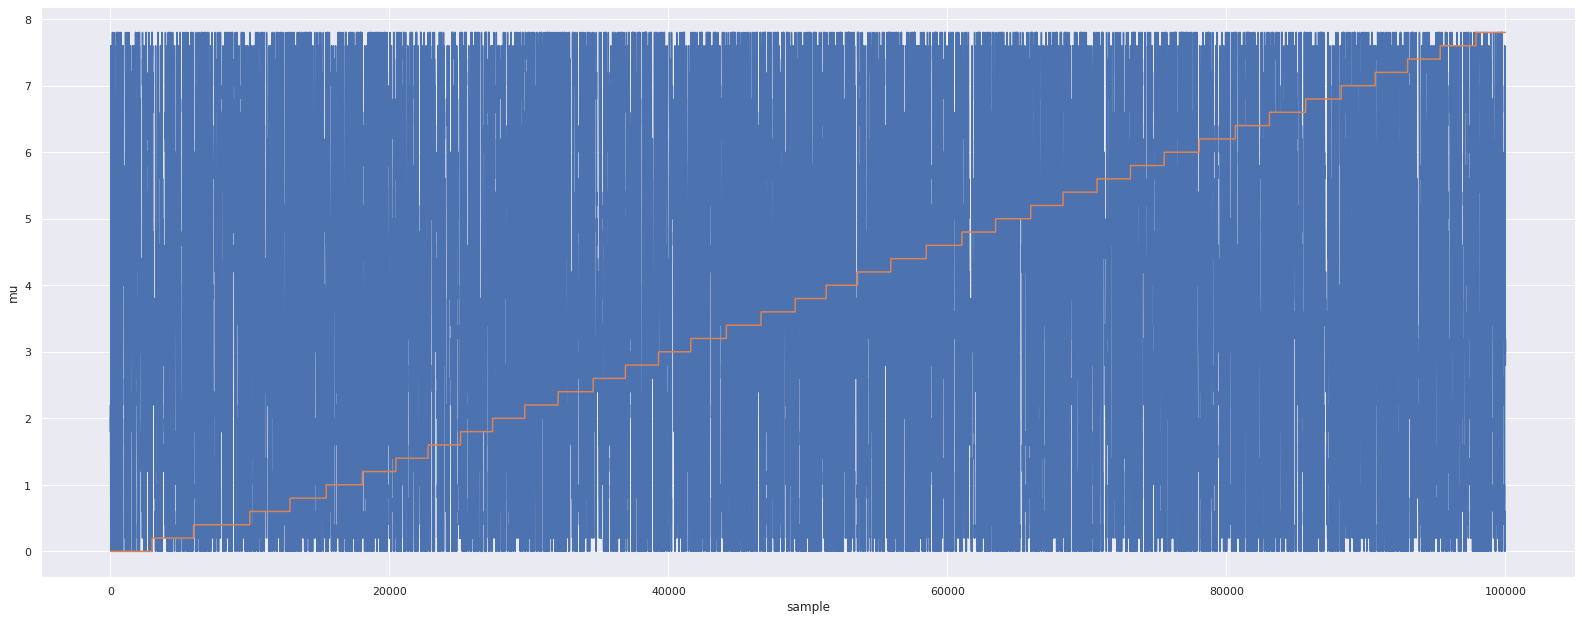

In [47]:
example_40_v2=MetropolisAlg_40_v2(2.0,100000,No_40_v2,P_40_v2,g_40_v2)

fig, ax = plt.subplots()
fig.set_size_inches(27.5, 10.5)
ax.plot(example_40_v2)
_ = ax.set(xlabel='sample', ylabel='mu');

plt.plot(sorted(example_40_v2))

Wartosc numeryczna całki = 159.371834
Wartosc teoretyczna całki = 170.670000


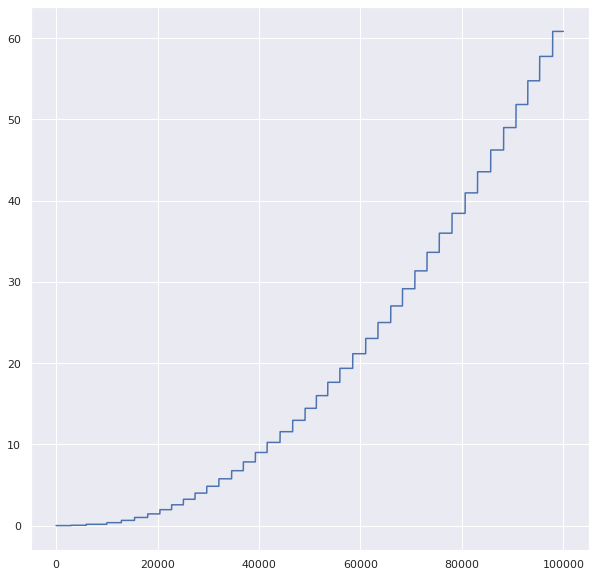

In [48]:
ff=lambda a: a**2
li=[ff(example_40_v2[i]) for i in range(0,100000)]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(sorted(li))

print("Wartosc numeryczna całki = %f"%((sum(li)/len(li)*8)))
print("Wartosc teoretyczna całki = %f"%(170.67))